# Unsupervised Learning Techniques

So far we have seen machine learning applications for supervised learning where the Y or dependent variable is known. 

Unsupervised means we have input features X but we do not have labels y. 

Lets think of a scenario where you need to identify defects in manufacturing equipment. So you need to build a model to do this. But you do not have any labels. You could manually label millions of photos or just label a subset of the data.

However what if we could just create a algorithmn  to exploit unlabeled data without needing humans to label every picture? 

This is where unsupervished learning techniques shines. 

Here are some of the algorithmns we will see in this chapter:

*Clustering* the goal is to group similar instances together into clusters. It is great for data analysis, customer segmentation, recommender systems, search engines, images segmentation, semi-superivised learning, dimensionality reductions and more. 

*Anomaly detection* the objective is to learn what "normal" data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in time series. 

*Density estimation* This is the task of estimating the probability density function(PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization. 

## Clustering

Clustering is when we identify similar instances and assigning them to clusters or groups of similar instances. 

In [1]:
#Importing libraries
# Scikit-Learn ≥0.20 is required
import sklearn
#assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#Using the Iris dataset to show the differences between Classification and clustering
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

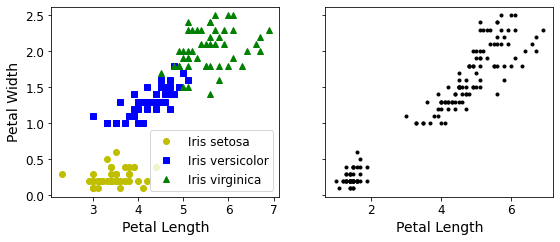

In [7]:
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plt.plot(X[y==0,1],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.xlabel("Petal Length",fontsize=14)
plt.ylabel("Petal Width",fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:,2],X[:,3],c="k",marker=".")
plt.xlabel("Petal Length",fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In the above we can see the left uses classification and it is easy to figure the bottom Iris setosa. THe top right ones are harder to identify but we are using just petal length and petal width. 

Here are some of the other useful applications:

* Customer segmentation
* Data Analysis
* Dimensionality Reduction Technique
* Anomaly detection
* Semi-supervished learning
* Search engines
* Segment an image

### K-MEANs clustering

K-MEANs lets us cluster using a simple algorithm. The way it works is you are given the centroids you then can easily label them in the dataset by assinging each of them to the cluster who centroid is closer. 

If you have the labels and centroids it would have been easier. 

To do this we can start placing randoms centroids  and by picking K(number of clusters) randomly, then label the instances, update the centroids. It keeps updating until the centroids stop moving and meeti. 

In [8]:
from sklearn.datasets import make_blobs

In [9]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [10]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [11]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

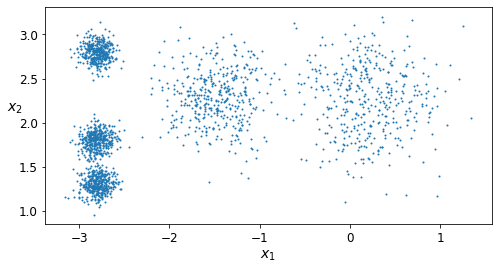

In [12]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
#save_fig("blobs_plot")
plt.show()

We can see above that the optimal K number is 5 since we can see a clear pattern. 

In [13]:
#Using K-MEANs
from sklearn.cluster import KMeans

In [17]:
k = 5
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)

In [19]:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [20]:
np.unique(y_pred) # 5 potential clusters

array([0, 1, 2, 3, 4], dtype=int32)

In [22]:
y_pred is kmeans.labels_

True

In [24]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [25]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [26]:
#Predicting new labels and plotting decision boundary
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [28]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

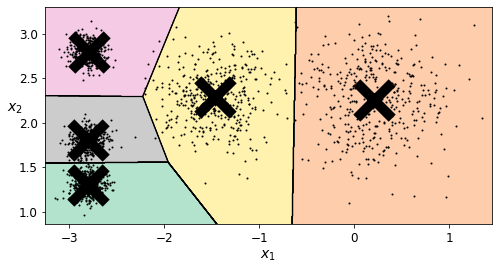

In [29]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
#save_fig("voronoi_plot")
plt.show()

We can see where the decision boundaries are on but there are some errors especially on the decision boundary. Above we used *Hard Clustering* where we assign a value per instance however we can use *Soft Clustering* where you assign a instance score per instance. The score can be the distance between the instance and the enctroid. 